In [603]:
#Data processing packages
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 300)

#Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [604]:
# https://www.kaggle.com/code/rawaaelghali/house-prices-data-exploration-with-python/notebook

In [635]:
#Importing YouTube comments data
#data = pd.read_csv('../input/glassdoorreviews.csv',encoding='utf8',error_bad_lines=False);#opening the file UScomments
data =  pd.read_excel ('data/Housing.xlsx')

In [636]:
data.head()


,MLIS#,Address,Zip,Price,Date,build,Type,Gaurage,Lot,BD,...,MiddleSchool,ListedOn,Interest_rate,basement,Improvement,HOA,Condition,direction,Agent,Pool
0,1,6 Burlington Ct,8820,730000,2022-07-26,1983,Single Family,2,10298,6,...,JAM,2022-06-03,5.52,yes,No,0.0,NaN,NaN,NaN,NaN
1,2,"2 Carriage Pl, Edison",8820,325000,2022-07-25,1983,TownHouse,1,1605,2,...,WW,2022-07-18,5.41,no,yes,400.0,NaN,NaN,NaN,NaN
2,3,23 Woodbrooke Dr,8820,450000,2022-07-30,1982,Single Family,1,6534,3,...,WW,2022-05-25,5.23,no,yes,0.0,NaN,NaN,NaN,NaN
3,4,800 Old Raritan Rd,8820,435000,2022-07-22,1927,Single Family,0,26000,4,...,JAM,2022-05-27,5.23,yes,yes,0.0,NaN,NaN,NaN,NaN
4,5,7 Mindy Rd,8820,840000,2022-07-22,1988,Single Family,2,5218,4,...,JAM,2022-07-07,5.41,yes,No,0.0,NaN,NaN,NaN,NaN


In [637]:
data.columns

Index(['MLIS#', 'Address', 'Zip', 'Price', 'Date', 'build', 'Type', 'Gaurage',
       'Lot', 'BD', 'BA', '.5BA', 'Style', 'Tax', 'Listing Price',
       'MiddleSchool', 'ListedOn', 'Interest_rate', 'basement', 'Improvement',
       'HOA', 'Condition', 'direction', 'Agent', 'Pool'],
      dtype='object')

In [638]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   MLIS#          100 non-null    int64         
 1   Address        100 non-null    object        
 2   Zip            100 non-null    int64         
 3   Price          100 non-null    int64         
 4   Date           100 non-null    datetime64[ns]
 5   build          100 non-null    int64         
 6   Type           100 non-null    object        
 7   Gaurage        100 non-null    int64         
 8   Lot            100 non-null    int64         
 9   BD             100 non-null    int64         
 10  BA             100 non-null    int64         
 11  .5BA           100 non-null    int64         
 12  Style          14 non-null     object        
 13  Tax            100 non-null    int64         
 14  Listing Price  100 non-null    int64         
 15  MiddleSchool   100 non-n

In [639]:
data.describe()

,MLIS#,Zip,Price,build,Gaurage,Lot,BD,BA,.5BA,Tax,Listing Price,Interest_rate,HOA
count,100.000000,100.0,100.00000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.00000,13.000000
mean,50.500000,8820.0,627439.99000,1974.170000,1.450000,10592.780000,3.46000,2.190000,0.730000,11960.540000,602294.870000,4.93820,86.538462
std,29.011492,0.0,141354.04161,15.007779,0.701729,7428.652313,0.91475,0.734366,0.583528,3694.450363,151160.579869,0.62328,168.515388
min,1.000000,8820.0,325000.00000,1927.000000,0.000000,1023.000000,2.00000,1.000000,0.000000,1442.000000,65000.000000,2.94000,0.000000
25%,25.750000,8820.0,513750.00000,1964.000000,1.000000,5133.250000,3.00000,2.000000,0.000000,9103.750000,495750.000000,4.98000,0.000000
50%,50.500000,8820.0,638750.00000,1973.000000,2.000000,9981.000000,3.00000,2.000000,1.000000,12340.500000,600000.000000,5.23000,0.000000
75%,75.250000,8820.0,735000.00000,1983.000000,2.000000,15015.000000,4.00000,2.000000,1.000000,13913.750000,707400.000000,5.23000,0.000000
max,100.000000,8820.0,929000.00000,2017.000000,2.000000,38900.000000,6.00000,5.000000,3.000000,21790.000000,939000.000000,5.52000,450.000000


In [640]:
data.isnull().sum()

MLIS#             0
Address           0
Zip               0
Price             0
Date              0
build             0
Type              0
Gaurage           0
Lot               0
BD                0
BA                0
.5BA              0
Style            86
Tax               0
Listing Price     0
MiddleSchool      0
ListedOn          0
Interest_rate     0
basement          0
Improvement       0
HOA              87
Condition        12
direction        94
Agent            28
Pool             99
dtype: int64

In [641]:
data["Agent"].fillna("Unknown", inplace = True)

In [642]:
data['delta']=data['Listing Price'] -data['Price'] 

In [643]:
data_jam=data[data['MiddleSchool']=='JAM']
data_ww=data[data['MiddleSchool']=='WW']

In [644]:
data_delta=data.where( (data.delta >=10000 )|(data.delta*-1 >=10000)).sort_values(by=['delta'])

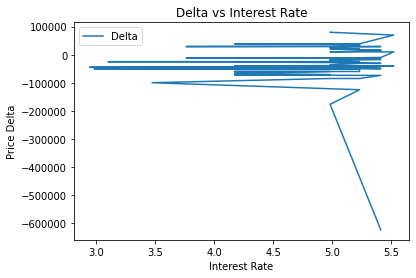

In [645]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#data[["Scaleddelta"]] = scaler.fit_transform(data[["delta"]])
data_delta.plot( 'Interest_rate' ,'delta' ,xlabel='Interest Rate', ylabel='Price Delta', title='Delta vs Interest Rate',label='Delta').legend()


In [646]:
data

,MLIS#,Address,Zip,Price,Date,build,Type,Gaurage,Lot,BD,...,ListedOn,Interest_rate,basement,Improvement,HOA,Condition,direction,Agent,Pool,delta
0,1,6 Burlington Ct,8820,730000,2022-07-26,1983,Single Family,2,10298,6,...,2022-06-03,5.52,yes,No,0.0,NaN,NaN,Unknown,NaN,69900
1,2,"2 Carriage Pl, Edison",8820,325000,2022-07-25,1983,TownHouse,1,1605,2,...,2022-07-18,5.41,no,yes,400.0,NaN,NaN,Unknown,NaN,15000
2,3,23 Woodbrooke Dr,8820,450000,2022-07-30,1982,Single Family,1,6534,3,...,2022-05-25,5.23,no,yes,0.0,NaN,NaN,Unknown,NaN,39000
3,4,800 Old Raritan Rd,8820,435000,2022-07-22,1927,Single Family,0,26000,4,...,2022-05-27,5.23,yes,yes,0.0,NaN,NaN,Unknown,NaN,-85000
4,5,7 Mindy Rd,8820,840000,2022-07-22,1988,Single Family,2,5218,4,...,2022-07-07,5.41,yes,No,0.0,NaN,NaN,Unknown,NaN,-40100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,9 Adrian Way,8820,820000,2022-05-31,1975,Single Family,2,14884,5,...,2022-04-02,4.98,yes,No,NaN,excellent,NaN,VICKY HSU,NaN,-20100
96,97,18 East Dr,8820,795000,2022-05-27,1986,Single Family,2,10488,4,...,2022-03-30,4.17,yes,yes,NaN,fair,NaN,Alka,NaN,-60000
97,98,8 Prestwick Way,8820,500000,2022-05-27,2001,TownHouse,1,1587,3,...,2022-03-25,4.17,no,No,NaN,good,NaN,BETTER HOMES,NaN,-1000
98,99,"904 Ellis Pkwy,",8820,651000,2022-05-27,1964,Single Family,0,8499,4,...,2022-03-19,4.17,no,No,NaN,good,NaN,WEICHERT,NaN,-51100


In [647]:
columns=["MLIS#",'Agent']
d=data[columns].groupby(['Agent']).count()
d.sort_values(by=['MLIS#'],ascending=False).head(5)

,MLIS#
Agent,
Unknown,28
KELLER WILLIAMS,16
RE/MAX,10
COLDWELL BANKER,5
BHHS,5


In [648]:
columns=["MLIS#",'Agent','MiddleSchool']
d=data[columns].groupby(['Agent','MiddleSchool']).count()
d.sort_values(by=['MLIS#'],ascending=False).head(8)

,,MLIS#
Agent,MiddleSchool,
Unknown,JAM,16
KELLER WILLIAMS,JAM,12
Unknown,WW,12
RE/MAX,JAM,6
BHHS,JAM,5
KELLER WILLIAMS,WW,4
RE/MAX,WW,4
COLDWELL BANKER,JAM,3


In [649]:
data_kw=data[data['Agent']=='KELLER WILLIAMS']

In [663]:
columns=['Price','Listing Price','build','Lot','MiddleSchool','Date','ListedOn','Interest_rate','delta']

data_kw[columns]

,Price,Listing Price,build,Lot,MiddleSchool,Date,ListedOn,Interest_rate,delta
32,625000,625000,1969,15920,JAM,2022-07-07,2022-05-22,5.23,0
37,510000,525000,1967,16568,JAM,2022-07-06,2022-05-27,5.23,15000
49,760000,735000,1985,13216,JAM,2022-06-30,2022-04-12,4.98,-25000
50,675000,659000,1973,10000,JAM,2022-06-30,2022-05-06,5.23,-16000
51,655000,655000,1970,10032,JAM,2022-06-30,2022-05-14,5.23,0
52,701000,689000,1967,15180,JAM,2022-06-30,2022-04-05,4.98,-12000
56,695000,659000,1959,20600,JAM,2022-06-27,2022-04-30,4.98,-36000
59,790000,799000,1967,14751,JAM,2022-06-24,2022-03-25,4.17,9000
63,560000,565000,1947,6011,WW,2022-06-22,2022-05-07,5.23,5000
69,381000,369000,1982,1372,JAM,2022-06-17,2022-05-04,5.23,-12000


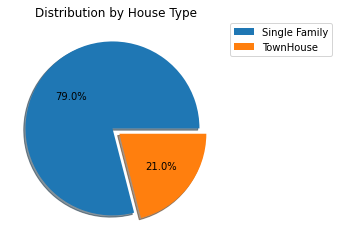

In [664]:
columns=["MLIS#",'Type']
g=data[columns].groupby(['Type']).count()
#g.plot(kind='pie', y='MLIS#',  title='Distribution by Type')
ax = g.plot(kind="pie", y='MLIS#',
               autopct='%1.1f%%', 
               shadow=True, 
               explode=[0.05, 0.05], 
               legend=True, 
               title='Distribution by House Type', 
               ylabel='', 
               labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

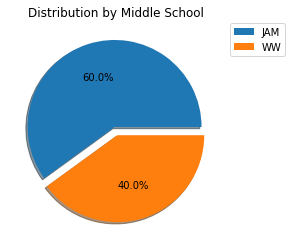

In [665]:
columns=["MLIS#",'MiddleSchool']
g=data[columns].groupby(['MiddleSchool']).count()
#g.plot(kind='pie', y='MLIS#',  title='Distribution by Type')
ax = g.plot(kind="pie", y='MLIS#',
               autopct='%1.1f%%', 
               shadow=True, 
               explode=[0.05, 0.05], 
               legend=True, 
               title='Distribution by Middle School', 
               ylabel='', 
               labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

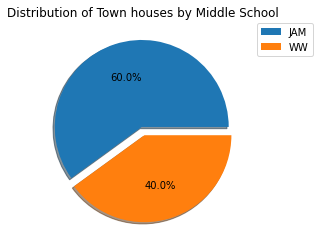

In [666]:
columns=["MLIS#",'MiddleSchool']
data_th=data[data['Type']=='TownHouse']
data_th
data_th[columns].groupby(['MiddleSchool']).count()
#g.plot(kind='pie', y='MLIS#',  title='Distribution by Type')
ax = g.plot(kind="pie", y='MLIS#',
               autopct='%1.1f%%', 
               shadow=True, 
               explode=[0.05, 0.05], 
               legend=True, 
               title='Distribution of Town houses by Middle School', 
               ylabel='', 
               labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

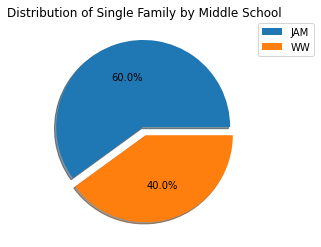

In [667]:
columns=["MLIS#",'MiddleSchool']
data_th=data[data['Type']=='Single Family']
data_th
data_th[columns].groupby(['MiddleSchool']).count()
#g.plot(kind='pie', y='MLIS#',  title='Distribution by Type')
ax = g.plot(kind="pie", y='MLIS#',
               autopct='%1.1f%%', 
               shadow=True, 
               explode=[0.05, 0.05], 
               legend=True, 
               title='Distribution of Single Family by Middle School', 
               ylabel='', 
               labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
plt.show()

In [668]:
columns=["Price",'MiddleSchool','Lot']
data[columns].groupby(['MiddleSchool']).mean()

,Price,Lot
MiddleSchool,,
JAM,638400.000,10146.116667
WW,610999.975,11262.775000


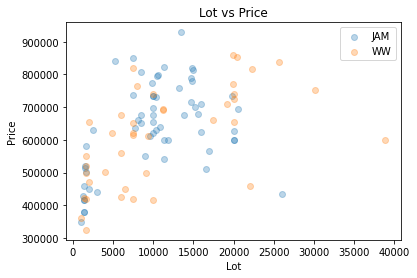

In [669]:




# depict illustration
plt.scatter(x=data_jam.Lot, y=data_jam.Price, alpha=0.3,color='tab:blue',label='JAM')
plt.scatter(x=data_ww.Lot, y=data_ww.Price, alpha=0.3,color='tab:orange',label='WW')
 
# apply legend()
plt.legend(["JAM" , "WW"])
plt.title("Lot vs Price")
plt.xlabel("Lot")
plt.ylabel("Price")
plt.show()

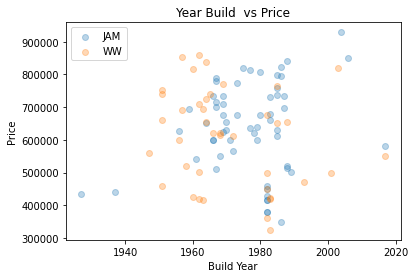

In [670]:

# depict illustration
plt.scatter(x=data_jam.build, y=data_jam.Price, alpha=0.3,color='tab:blue',label='JAM')
plt.scatter(x=data_ww.build, y=data_ww.Price, alpha=0.3,color='tab:orange',label='WW')
 
# apply legend()
plt.legend(["JAM" , "WW"])
plt.title("Year Build  vs Price")
plt.xlabel("Build Year")
plt.ylabel("Price")
plt.show()

In [658]:
#https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
from scipy import stats
z = np.abs(stats.zscore(data['Price']))
print(np.where(z > 3))

(array([], dtype=int64),)


In [659]:
#https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
from scipy import stats
z = np.abs(stats.zscore(data['Price']))
print(np.where(z > 3))

(array([], dtype=int64),)


In [660]:
Q1 = np.percentile(data['Lot'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['Lot'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

upper = data['Lot'] >= (Q3+1.5*IQR)
 
print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = data['Lot'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))


Upper bound: 0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: Lot, Length: 100, dtype: bool
(array([93]),)
Lower bound: 0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Name: Lot, Length: 100, dtype: bool
(array([], dtype=int64),)


In [661]:
data.iloc[93]

MLIS#                             94
Address            492 Plainfield Rd
Zip                             8820
Price                         600000
Date             2022-06-01 00:00:00
build                           1956
Type                   Single Family
Gaurage                            2
Lot                            38900
BD                                 3
BA                                 2
.5BA                               2
Style                            NaN
Tax                            11343
Listing Price                 559000
MiddleSchool                      WW
ListedOn         2022-04-01 00:00:00
Interest_rate                   4.98
basement                         yes
Improvement                      yes
HOA                              NaN
Condition                       fair
direction                        NaN
Agent                KELLER WILLIAMS
Pool                             NaN
delta                         -41000
Name: 93, dtype: object

In [671]:
data

,MLIS#,Address,Zip,Price,Date,build,Type,Gaurage,Lot,BD,...,ListedOn,Interest_rate,basement,Improvement,HOA,Condition,direction,Agent,Pool,delta
0,1,6 Burlington Ct,8820,730000,2022-07-26,1983,Single Family,2,10298,6,...,2022-06-03,5.52,yes,No,0.0,NaN,NaN,Unknown,NaN,69900
1,2,"2 Carriage Pl, Edison",8820,325000,2022-07-25,1983,TownHouse,1,1605,2,...,2022-07-18,5.41,no,yes,400.0,NaN,NaN,Unknown,NaN,15000
2,3,23 Woodbrooke Dr,8820,450000,2022-07-30,1982,Single Family,1,6534,3,...,2022-05-25,5.23,no,yes,0.0,NaN,NaN,Unknown,NaN,39000
3,4,800 Old Raritan Rd,8820,435000,2022-07-22,1927,Single Family,0,26000,4,...,2022-05-27,5.23,yes,yes,0.0,NaN,NaN,Unknown,NaN,-85000
4,5,7 Mindy Rd,8820,840000,2022-07-22,1988,Single Family,2,5218,4,...,2022-07-07,5.41,yes,No,0.0,NaN,NaN,Unknown,NaN,-40100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,9 Adrian Way,8820,820000,2022-05-31,1975,Single Family,2,14884,5,...,2022-04-02,4.98,yes,No,NaN,excellent,NaN,VICKY HSU,NaN,-20100
96,97,18 East Dr,8820,795000,2022-05-27,1986,Single Family,2,10488,4,...,2022-03-30,4.17,yes,yes,NaN,fair,NaN,Alka,NaN,-60000
97,98,8 Prestwick Way,8820,500000,2022-05-27,2001,TownHouse,1,1587,3,...,2022-03-25,4.17,no,No,NaN,good,NaN,BETTER HOMES,NaN,-1000
98,99,"904 Ellis Pkwy,",8820,651000,2022-05-27,1964,Single Family,0,8499,4,...,2022-03-19,4.17,no,No,NaN,good,NaN,WEICHERT,NaN,-51100


In [672]:
data['ListedOnNum']=(data['ListedOn'] - data['ListedOn'].min())  / np.timedelta64(1,'D')

In [673]:
data['DateNum']=(data['Date'] - data['Date'].min())  / np.timedelta64(1,'D')

In [674]:
# drop columns
columns = ['MLIS#','Style', 'HOA', 'Condition','direction','Agent','Pool','Zip','Address','ListedOn','Date']
df = data.drop(columns, axis=1)


In [675]:
# replacing values
df['Type'].replace(['Single Family', 'TownHouse'],
                        [1, 0], inplace=True)
# replacing values
df['MiddleSchool'].replace(['WW', 'JAM'],
                        [1, 0], inplace=True)
# replacing values
df['basement'].replace(['yes', 'no'],
                        [1, 0], inplace=True)
# replacing values
df['Improvement'].replace(['yes', 'No'],
                        [1, 0], inplace=True)


In [676]:
df.head()

,Price,build,Type,Gaurage,Lot,BD,BA,.5BA,Tax,Listing Price,MiddleSchool,Interest_rate,basement,Improvement,delta,ListedOnNum,DateNum
0,730000,1983,1,2,10298,6,2,2,16670,799900,0,5.52,1,0,69900,827.0,420.0
1,325000,1983,0,1,1605,2,1,1,7131,340000,1,5.41,0,1,15000,872.0,419.0
2,450000,1982,1,1,6534,3,2,0,8695,489000,1,5.23,0,1,39000,818.0,424.0
3,435000,1927,1,0,26000,4,2,0,8488,350000,0,5.23,1,1,-85000,820.0,416.0
4,840000,1988,1,2,5218,4,3,1,18760,799900,0,5.41,1,0,-40100,861.0,416.0


In [677]:
df_sf=df[df['Type']==1]
df_th=df[df['Type']==0]

In [678]:
data_ww=df_sf[df_sf['MiddleSchool']==1]
data_jam=df_sf[df_sf['MiddleSchool']==0]

In [680]:
df_sf

,Price,build,Type,Gaurage,Lot,BD,BA,.5BA,Tax,Listing Price,MiddleSchool,Interest_rate,basement,Improvement,delta,ListedOnNum,DateNum
0,730000,1983,1,2,10298,6,2,2,16670,799900,0,5.52,1,0,69900,827.0,420.0
2,450000,1982,1,1,6534,3,2,0,8695,489000,1,5.23,0,1,39000,818.0,424.0
3,435000,1927,1,0,26000,4,2,0,8488,350000,0,5.23,1,1,-85000,820.0,416.0
4,840000,1988,1,2,5218,4,3,1,18760,799900,0,5.41,1,0,-40100,861.0,416.0
5,815000,1977,1,2,14960,5,3,1,14781,789000,0,4.17,1,0,-26000,744.0,416.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,850000,2006,1,2,7500,4,3,1,20138,850000,0,2.96,1,0,0,444.0,0.0
95,820000,1975,1,2,14884,5,5,0,18134,799900,0,4.98,1,0,-20100,765.0,364.0
96,795000,1986,1,2,10488,4,2,1,15003,735000,0,4.17,1,1,-60000,762.0,360.0
98,651000,1964,1,0,8499,4,3,3,10283,599900,0,4.17,0,0,-51100,751.0,360.0


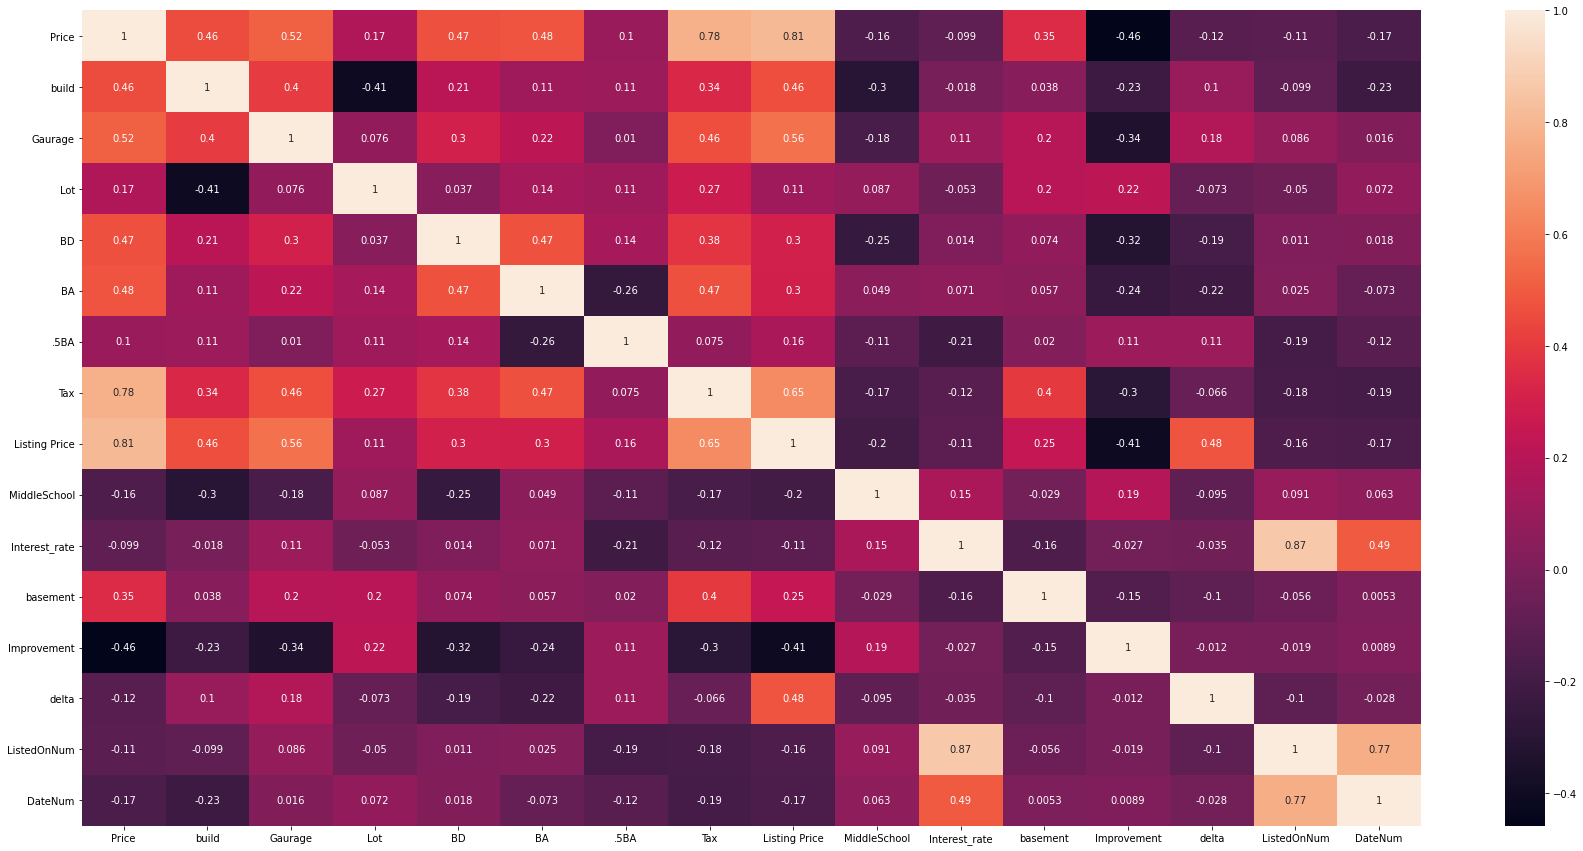

In [681]:
#correlation matrix
corrmat = df_sf.drop('Type',axis=1).corr()
f, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(corrmat,annot=True);

In [682]:
x_train=df_sf.drop(['Price'],axis=1)
y_train=df_sf['Price']

In [683]:
y_test=df_sf['Price']
x_test=df_sf.drop(['Price'],axis=1)

In [684]:
x_train

,build,Type,Gaurage,Lot,BD,BA,.5BA,Tax,Listing Price,MiddleSchool,Interest_rate,basement,Improvement,delta,ListedOnNum,DateNum
0,1983,1,2,10298,6,2,2,16670,799900,0,5.52,1,0,69900,827.0,420.0
2,1982,1,1,6534,3,2,0,8695,489000,1,5.23,0,1,39000,818.0,424.0
3,1927,1,0,26000,4,2,0,8488,350000,0,5.23,1,1,-85000,820.0,416.0
4,1988,1,2,5218,4,3,1,18760,799900,0,5.41,1,0,-40100,861.0,416.0
5,1977,1,2,14960,5,3,1,14781,789000,0,4.17,1,0,-26000,744.0,416.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2006,1,2,7500,4,3,1,20138,850000,0,2.96,1,0,0,444.0,0.0
95,1975,1,2,14884,5,5,0,18134,799900,0,4.98,1,0,-20100,765.0,364.0
96,1986,1,2,10488,4,2,1,15003,735000,0,4.17,1,1,-60000,762.0,360.0
98,1964,1,0,8499,4,3,3,10283,599900,0,4.17,0,0,-51100,751.0,360.0


In [699]:
from xgboost import XGBRegressor
xgbr=XGBRegressor(verbosity=0)
print(xgbr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)


In [700]:
#pip install xgboost

In [701]:
xgbr.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [702]:
score= xgbr.score(x_train,y_train)
print('Training score : ', score)

Training score :  0.9999999999994827


In [704]:
y_pred = xgbr.predict(x_test)
y_pred

array([730000.06, 450000.03, 435000.03, 839999.94, 815000.06, 542000.06,
       859999.94, 928999.94, 622500.06, 564999.9 , 654999.9 , 611000.  ,
       660000.  , 620000.  , 689999.94, 675000.06, 775000.  , 817000.06,
       619999.94, 823999.8 , 798999.94, 629000.  , 610499.94, 599999.94,
       625000.25, 680000.  , 651999.94, 600000.1 , 599999.9 , 509999.97,
       600000.1 , 675000.  , 637500.  , 837999.94, 499999.94, 780999.94,
       725000.2 , 759999.9 , 675000.1 , 654999.75, 701000.  , 425000.  ,
       414999.97, 698999.94, 694999.94, 420000.06, 708999.94, 789999.94,
       693999.94, 734999.94, 735000.  , 560000.06, 714999.94, 740000.06,
       614999.9 , 821000.06, 766000.06, 739999.94, 735000.  , 503000.03,
       549999.94, 710000.1 , 853999.94, 805999.9 , 460000.03, 660000.  ,
       737500.1 , 519999.94, 751000.06, 675999.06, 639999.94, 625999.94,
       440000.03, 600000.06, 849999.94, 820000.1 , 795000.06, 651000.06,
       769999.9 ], dtype=float32)

In [705]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=300)
clf.fit(x_train,y_train)
score=clf.score(x_test,y_test)
print('Training score : ', score)

Training score :  0.985070640667225


In [706]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train, y_train)
predictions = regr.predict(x_test)

In [707]:
predictions

array([793517.08844539, 486199.16402394, 480971.49973648, 812978.40635705,
       792599.72733428, 610393.12820323, 812883.45822717, 816684.26469039,
       615169.96905961, 596184.41653845, 676327.55329385, 628828.08664731,
       706580.33412169, 613856.75277306, 584800.49095591, 659366.37489524,
       790236.68691855, 811938.46588086, 661325.3820511 , 787973.04226418,
       792599.72733428, 645027.77472692, 615795.95099817, 617307.64984437,
       645027.77472692, 678139.67007585, 621800.4316051 , 611742.92696484,
       613081.3495182 , 569822.67217254, 612710.63523249, 694355.54074298,
       672019.55875735, 792599.72733428, 478464.61208598, 785565.76693347,
       768929.87710978, 765963.67698093, 676327.55329385, 672019.55875735,
       695213.32950067, 478464.61208598, 479814.41084759, 667203.32349428,
       676327.55329385, 479711.27875265, 655208.21219208, 792599.72733428,
       627510.42210482, 759103.60242885, 736919.44945224, 544624.50943468,
       709199.40666572, 7